# Example for an analytical solution of weakly scattering sphere in Python

In this example the analytical solution for a weakly scattering sphere is based on Anderson, V. C., "Sound scattering from a fluid sphere", 
 J. Acoust. Soc. America, 22 (4), pp 426-431, July 1950 is computed in it's original form and the simplified version from Jech et al. (2015).

For the original Anderson (1950) version, several variable need to be defined to compute the target strength (TS):
- Define the sphere
    - radius (Radius) in m
    - range (Range) which is the distance from the sound emitting device to the center of the sphere (m)
    - density of the sphere (Rho_b) (kg/$m^3$)
    - sound velocity inside the sphere (c_b) (m/s)
- Define the surrounding fluid
    - sound velocity in the surrounding fluid (c_w)(m/s)
    - density of the surrounding fluid (kg/$m^3$)
- Define the plane wave 
    - Frequency (f) (Hz)
    - Scattering angle relative to the travelling direction of the incident wave (rad)
    
Example for a 1 cm sphere with a density and sound velcoity contrast of 1.0025, at a range of 10 m, well outside of the nearfield at a frequency of 200 kHz with an assumed sound velocity of 1500 m/s and a density of 1026 kg/m^3 for the surrounding fluid, measured at 90 degrees (i.e. 1.571 rad):

In [44]:
from fluid_sphere import *
import time #just to time the execution of the script
#Define variables
c_w = 1500 
f = 200000
c_b = 1.0025*1500
Range = 10
Radius = 0.01
Rho_w = 1026
Rho_b = 1.0025 * Rho_w
Theta = 1.571
#get TS
TS = fluid_sphere(f=f,Radius=Radius, Range=Range,Rho_w=Rho_w,Rho_b=Rho_b,Theta=Theta,c_w=c_w,c_b=c_b)
print("TS for the sphere is %.2f dB"%TS)

TS for the sphere is -98.53 dB


TS can easily becomputed for a range of frequencies, here from 1 to 300 kHz at 0.5 kHz steps:

In [45]:
freqs = np.arange(1,300,0.5)*1000
start = time.perf_counter()
TS = [fluid_sphere(f=x,Radius=Radius, Range=Range,Rho_w=Rho_w,Rho_b=Rho_b,Theta=Theta,c_w=c_w,c_b=c_b) for x in freqs]
end = time.perf_counter()
tel_0 = end - start
print("Evaluating the TS took %.2f seconds"%tel_0)

Evaluating the TS took 0.44 seconds


Plot the results:

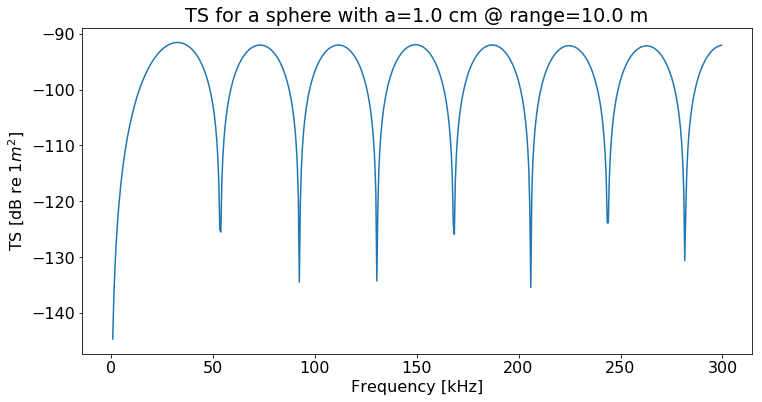

In [46]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(freqs/1000, TS)
plt.xlabel("Frequency [kHz]")
plt.ylabel("TS [dB re 1$m^2$]")
plt.title("TS for a sphere with a=%.1f cm @ range=%.1f m"%(Radius*100,Range))
plt.show()

Similarly for the simplified version, the sound velocity in the external fluid (c, m/s), the frequency (f, Hz), the density and sound velocity contrasts (g and h), distance to the sphere (r, m), the radius of the sphere (a,m) and the density of the surrounding fluid (rho, kg m^-3) need to be defined.

In [47]:
f = 200000
r = 10
a = 0.01
c = 1500
h = 1.0025
g = 1.0025
rho = 1026
TS = fluid_sphere_simple(f,r,a,c,h,g,rho)
print("TS for the sphere is %.2f dB"%TS)

start = time.perf_counter()
TS = [fluid_sphere_simple(f=x,r=r,a=a,c=c,h=h,g=g,rho=rho) for x in freqs]
end = time.perf_counter()
tel_1 = end - start
print("Evaluating the TS took %.2f seconds"%tel_0)

TS for the sphere is -98.53 dB
Evaluating the TS took 0.44 seconds


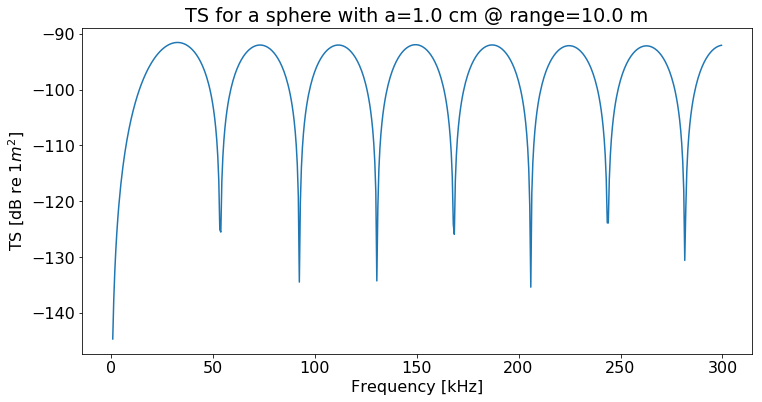

In [48]:
plt.rcParams.update({'font.size': 16})

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(freqs/1000, TS)
plt.xlabel("Frequency [kHz]")
plt.ylabel("TS [dB re 1$m^2$]")
plt.title("TS for a sphere with a=%.1f cm @ range=%.1f m"%(Radius*100,Range))
plt.show()

In [52]:
if tel_1 < tel_0:
    print("The simplified method (%.2f s) evaluated the TS %.2f s faster then "
    "the original Anderson (1950) method (%.2f s)"%(tel_1,np.abs(tel_1-tel_0),tel_0))
else:
    print("The simplified method (%.2f s) evaluated the TS %.2f s slower then "
    "the original Anderson (1950) method (%.2f s)"%(tel_1,np.abs(tel_1-tel_0),tel_0))

The simplified method (0.36 s) evaluated the TS 0.07 s slower then the original Anderson (1950) method (0.44 s)


Both methods should deliver the same results for backscatter at a 90 degrees angle, but the original Anderson (1950) is more flexible in terms of scattering angle and could easily be extended to include shear and surface pressure or be validated for a solid sphere.